<a href="https://colab.research.google.com/github/campusplage/compte-rendus-oriol_ramirez/blob/master/TP2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 2: Utiliser l'analyse en composantes principales de `scikit-learn`




---
Ce notebook contient votre compte-rendu pour le TP2.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.
  __La procédure à suivre sera la même pour tous les TP. Sa mise en œuvre correspond au quart de la note.__

## b. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## a. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
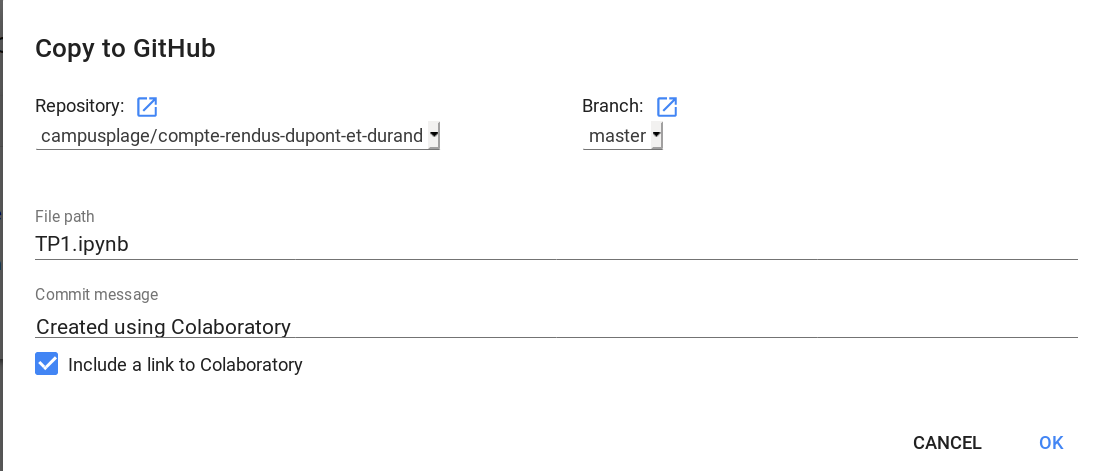

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 1. Charger et manipuler des données LFW (3 points)

## a. Téléchargement des données

Dans ce TP, nous allons travailler avec un autre ensemble de données provenant du challenge [_labeled faces in the wild_](http://vis-www.cs.umass.edu/lfw/). Il s'agit d'un ensemble de photos de visages en noir et blanc.

In [1]:
# différents imports utiles par la suite
import pandas
import sklearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Téléchargement des données
d = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

## b. Accès aux données

Dans la cellule précédente, nous avons téléchargé des données contenant un gros milliers d'images noires et blanc de visages d'hommes politiques.  

Ces données sont regroupées dans variable `data_dict`, qui est un _dictionnaire_ ([dict](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict)).

> Un dictionnaire est une structure de donnée qui permet de regrouper plusieurs valeurs hétérogènes, un peu à la manière d'une ligne donnée d'un `DataFrame` de pandas.
>
> Par exemple, on peut définir le dictionnaire suivant:
> ```python
student = {'name':'Dupont',
           'first name': 'Jean',
           'age': 23,
           'marks': [10, 13, 15.5, 11]
           }
  ```
> Il est constitué de 4 entrées appelées _clés_ (keys), qu'on peut lister par la méthode du même nom:
> ```python
  student.keys()
  ```  
> Et  on peut accéder à une entrée donnée par l'opérateur `[]` ou bien par `.`:
>```python
student['age']
student.age
```


In [2]:
# Liste des clés de la variable d
d.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

## c. Manipulations élémentaires de `ndarrays`

Affichez le type de toutes les entrées de `d`

> utilisez les fonctions `print` et `type` dans une boucle `for`

In [3]:
# Liste des types de toutes les entrées de la variable d
for valeur in d:
  print(valeur, ": ",type(d[valeur]))

data :  <class 'numpy.ndarray'>
images :  <class 'numpy.ndarray'>
target :  <class 'numpy.ndarray'>
target_names :  <class 'numpy.ndarray'>
DESCR :  <class 'str'>


Comme vous le voyez, les données sont des [`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), la structure de base de la bibliothèque `numpy` qu'on a déja vue.

Cette structure très puissante de données numériques permet de facilement faire des calculs et accédez à des données.

In [4]:
# Affichage des dimensions de la variable d.images (c'est un tableau en trois dimensions)
np.shape(d.images)

(1560, 50, 37)

In [5]:
# La première dimension de d.images représente le nombre d'images (nb_samples), 
# la deuxième le nombre de pixel en hauteur (height), et la troisième le nombre de pixel en largeur (width).
nb_samples, height, width = np.shape(d.images)


Comme vous le constatez, `d.images` regroupe $1560$ images, chacune étant de dimensions $50\times 37=1850$ pixels.

In [6]:
# Chaque ligne de `d.data` n'est rien d'autre que la version aplatie de l'image
# correspondante dans `d.images`
print('Are d.data[10] and d.images[10].flatten() the same ?',
      np.allclose(d.data[10], d.images[10].flatten()))
# (où on a rencontré la fonction `allclose` de numpy qui compare des `ndarray`
# et la méthode `flatten` qui applatie un `ndarray`)


# en fait, on aurait pu construire cette version applatie très simplement, avec 
# la méthode `reshape` des `ndarray`:
flattened =  d.images.reshape((nb_samples, height * width))
print('Is `flattened` equal to `d.data` ? ', 
      np.allclose(flattened, d.data))

Are d.data[10] and d.images[10].flatten() the same ? True
Is `flattened` equal to `d.data` ?  True


In [7]:
# Pour extraire les 10 premières images, il suffit de faire :
d.data[:10]

# Pour extraire les pixels 50...99 des 10 premières images :
d.data[:10, 50:100]

# Il s'agit d'une sélection dans la ndarray `data`. C'est elle même une ndarray.
print(d.data[:10, 50:100].shape)

(10, 50)


Maintenant, voyons quel est le nom des personnes dans les $10$ premières images.

In [8]:
# Boucle : tant que index est dans range(10)= liste de 0 à 9 
for index in range(10):
  #Selectionne les 10 premiers personnes de d.target et affiche leur nom contenu depuis d.target_names
  print(d.target_names[d.target[index]])

Tony Blair
Gerhard Schroeder
Donald Rumsfeld
George W Bush
George W Bush
Colin Powell
Ariel Sharon
George W Bush
Colin Powell
George W Bush


In [9]:
# Cette fois-ci, on utilise une technique de slicing au lieu d'une boucle
print(d.target_names[d.target[:10]])

['Tony Blair' 'Gerhard Schroeder' 'Donald Rumsfeld' 'George W Bush'
 'George W Bush' 'Colin Powell' 'Ariel Sharon' 'George W Bush'
 'Colin Powell' 'George W Bush']


## b. Affichage 


Nous définissons maintenant deux fonctions utilitaires:
* `plot_images` qui prend en entrée: des images sous forme de lignes, un titre à indiquer pour la figure, et qui se charge d'un affichage
* `shuffle` mélange un lot d'images. C'est utile pour ne pas tout le temps afficher les mêmes premières si on n'a pas envie

In [10]:
# Fonction utilitaire pour réorganiser aléatoirement des images
def shuffle(images):
  result = images.copy()
  np.random.shuffle(result)
  return result

# Fonction qui permet d'afficher les images 
def plot_images(images, title='', n_row=3, n_col=4, shuffle=True):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row+0.5))
    plt.suptitle(title)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

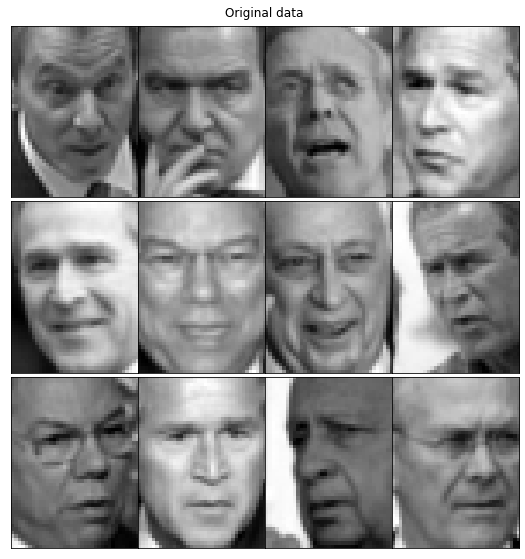

In [11]:
# Affichage des premières images
plot_images(d.data, 'Original data')

In [12]:
# Liste du nombre d'images par personnes (échantillons par label)
for (i, name) in enumerate(d.target_names): # La fonction enumerate() permet d'ajouter un compteur 
  print('target %d, name: %s, number of matches: %d' % (i, name, np.sum(d.target == i)))

target 0, name: Ariel Sharon, number of matches: 77
target 1, name: Colin Powell, number of matches: 236
target 2, name: Donald Rumsfeld, number of matches: 121
target 3, name: George W Bush, number of matches: 530
target 4, name: Gerhard Schroeder, number of matches: 109
target 5, name: Hugo Chavez, number of matches: 71
target 6, name: Jacques Chirac, number of matches: 52
target 7, name: Jean Chretien, number of matches: 55
target 8, name: John Ashcroft, number of matches: 53
target 9, name: Junichiro Koizumi, number of matches: 60
target 10, name: Serena Williams, number of matches: 52
target 11, name: Tony Blair, number of matches: 144


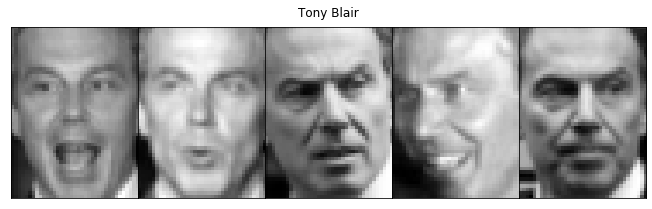

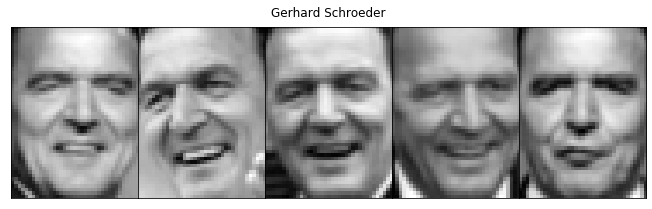

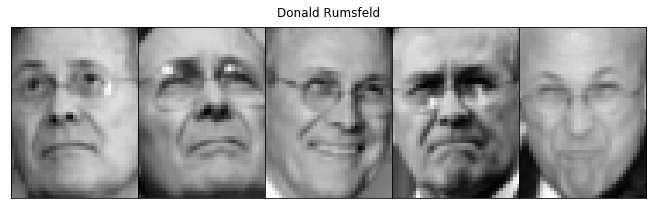

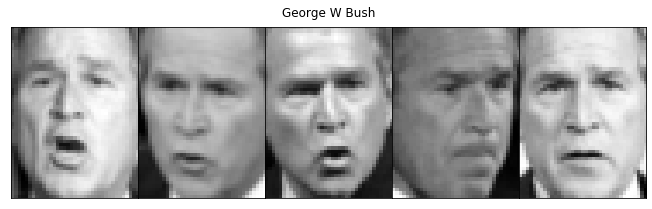

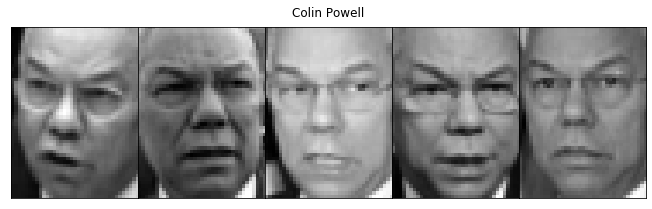

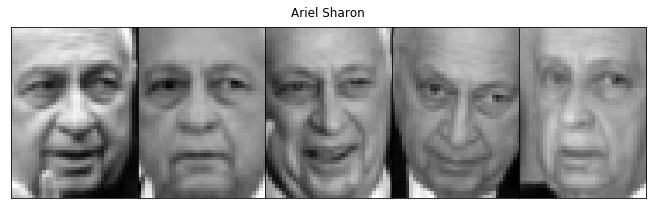

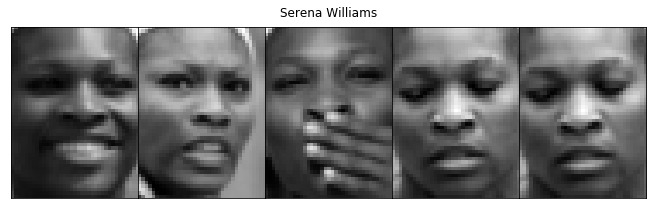

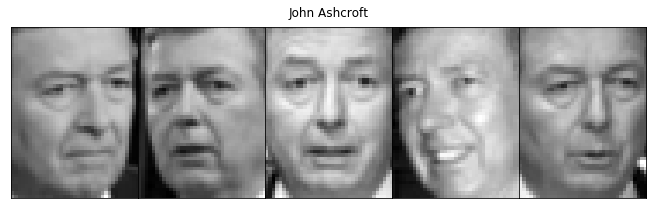

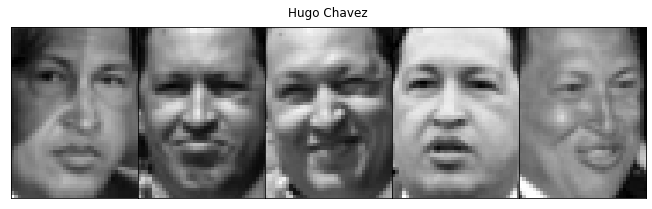

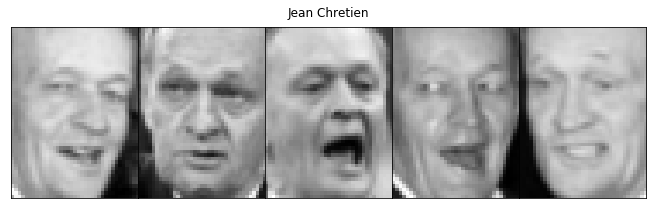

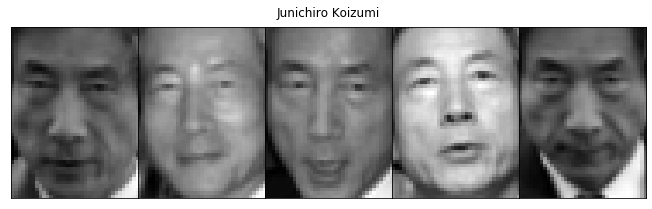

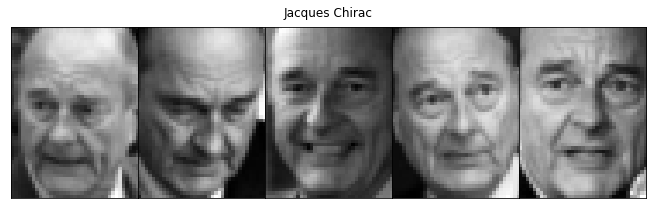

In [13]:
# Création d'une liste par personne, chacune de ces listes contient l'ensemble des images de cette personne
dic = {}
for index in range(len(d.target)):
    dic.setdefault(d.target_names[d.target[index]],[])
    dic[d.target_names[d.target[index]]].append(d.images[index])
#############################################################################################################

# Affichage d'une liste de 5 photos aléatoire de toutes les personnes
for el in dic.keys():
    plot_images(shuffle(dic[el]), el,1,5) # On utilise la fonction shuffle pour la partie aléatoire


# Exploitation simple d'une ACP (5 points)

## a. Apprentissage et reconstruction 

Dans les cellules suivantes, vous allez calculer une ACP sur ces données d'images.

Attention à la normalisation. Vous pouvez soit effectuer cette normalisation à la main, soit explorer un peu [la doc de sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

$\Rightarrow$ Appelez `data_pca` les données en basse dimension  
$\Rightarrow$ Appelez `reconstruction` le résultat de la fonction `pca.inverse_transform` appliqué à `data_pca`. De quoi s'agit-il ? Affichez le

In [14]:
# Création d'une ACP de d.data (donc des images),avec comme nombre de composants deux
pca = PCA(n_components=2)
pca.fit(d.data)
data_pca = pca.transform(d.data) # Calcule de la transformer des images
reconstruction = pca.inverse_transform(data_pca) # Calcule de la reconstruction des images
reconstruction[:5,None] # Affichage des cinq premières lignes de reconstruction

array([[[ 82.30153 ,  84.60909 ,  90.32536 , ..., 106.433655,
         102.13633 ,  97.53931 ]],

       [[ 74.25583 ,  77.88957 ,  83.95258 , ..., 138.59799 ,
         132.533   , 126.03722 ]],

       [[ 67.30571 ,  72.76832 ,  79.89294 , ..., 176.3871  ,
         167.98581 , 159.03314 ]],

       [[ 94.03607 ,  99.13475 , 109.615616, ..., 128.71106 ,
         121.39476 , 113.91908 ]],

       [[ 62.07592 ,  69.15446 ,  77.345314, ..., 208.33295 ,
         197.88965 , 186.80168 ]]], dtype=float32)

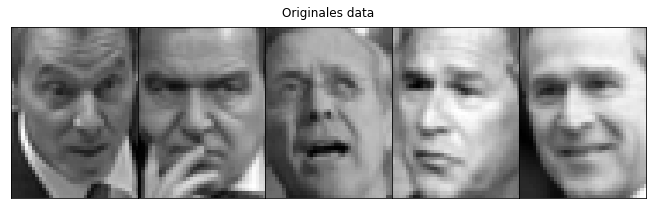

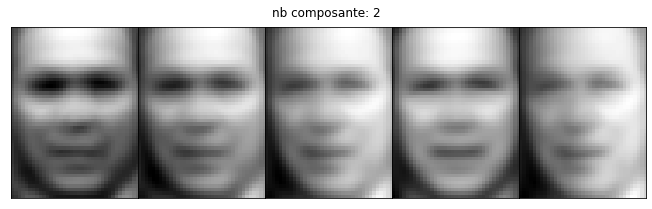

In [15]:
# Affichage des 5 premières images originales
plot_images(d.data, 'Originales data',1,5)

# Affichage de ces 5 mêmes images en ayant effectué une ACP avec 2 composants
plot_images(reconstruction, 'nb composante: 2 ',1,5)

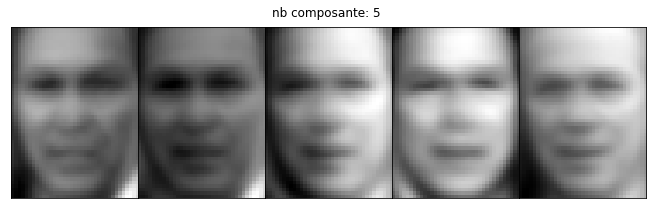

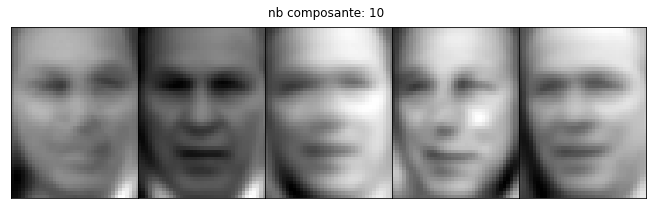

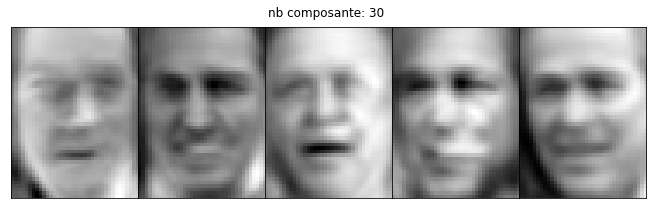

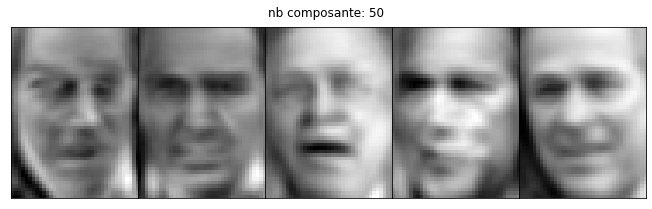

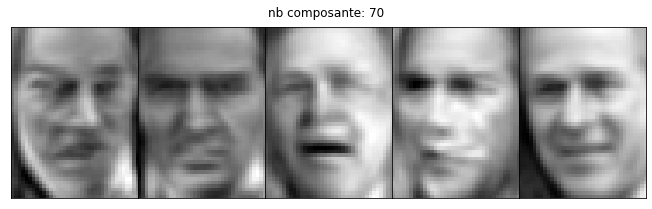

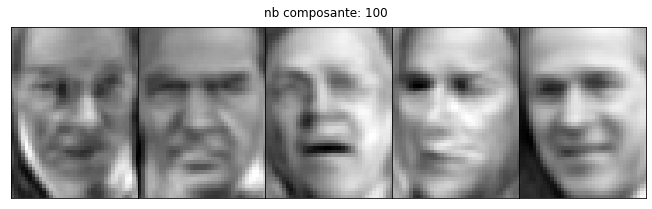

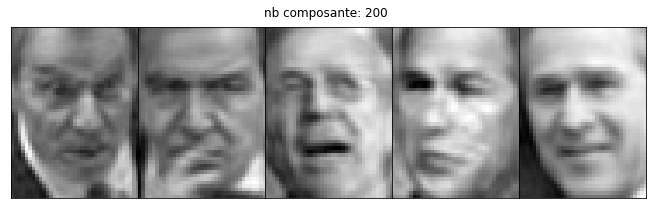

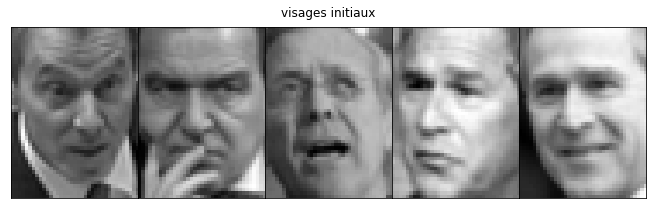

In [16]:
# Création d'une boucle qui réalise à la suite, 7 ACP des mêmes images, avec comme nombre de composants
#  5, 10, 30, 50, 70, 100, 200, elle affiche ensuite le résultat
for ncomp in [5, 10, 30, 50, 70, 100, 200]:
    # Calcule de l'acp sur nos images avec comme nombre de composants une variables qui prendra nos différentes valeurs
    pca = PCA(n_components=ncomp)
    pca.fit(d.data)
    data_pca = pca.transform(d.data) # Calcule de la transformer des images
    reconstruction = pca.inverse_transform(data_pca) # Calcule de la reconstruction des images
    # Affichage du résultat sur une ligne avec 5 images différentes
    plot_images(reconstruction, 'nb composante: {} '.format(ncomp ),1,5)

# Affichage des 5 premières images originales
plot_images(d.data, 'visages initiaux', n_row=1, n_col=5)


## b. Affichages par scores

Voyons si le score donné par l'ACP de `scikit-learn` peut être interprétable.

> Affichez les $10$ échantillons avec le meilleur score et les $10$ avec les pires scores. Interprétez  

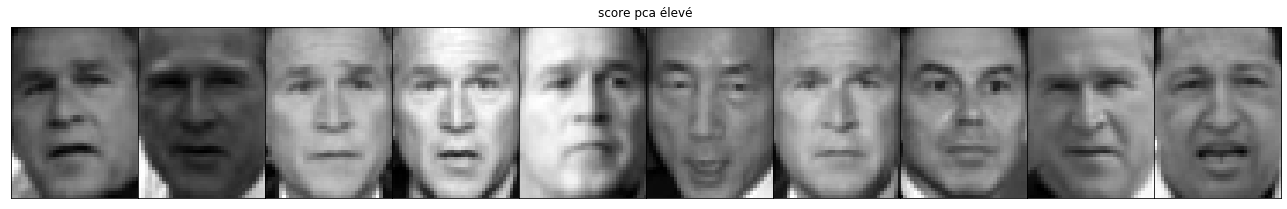

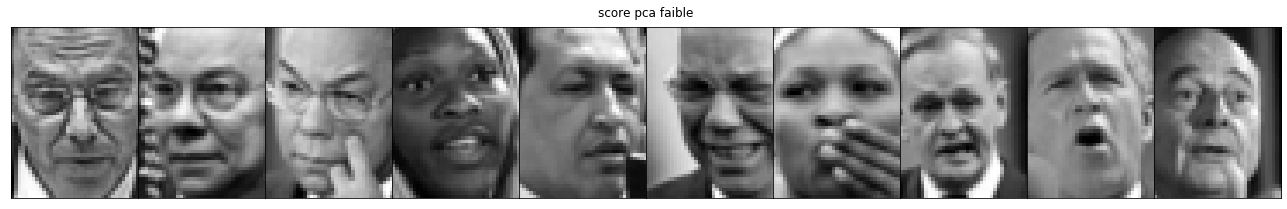

In [17]:
score_ACP=pca.score_samples(d.data) # Extraction des scores
score = np.argsort(score_ACP) # Trie des scores des plus petits au plus grand
data_high = score[-10:] # Sélections des 10 derniers scores (les 10 plus grands)
data_low = score[:10]  # Sélections des 10 premiers scores (les 10 plus petits)

# Affichage du résultat des différents scores sur deux lignes différentes
plot_images(d.data[data_high], 'score pca élevé', n_row=1, n_col=10) # Les scores les plus petits
plot_images(d.data[data_low], 'score pca faible', n_row=1, n_col=10) # Les scores les plus grands

__Interprétation__  
La première chose que l'on peut remarquer sur les images ayant un score pca élevé est leur ressemblance.<br>
On peut voir tout le visage le regard est en direction de l'objectif et on ne voit aucune main ou expression<br>
particulièrement forte.<br>
A contrario les images ayant un score pca faible ont un regard fuyant l'objectif, avec des lunettes des mains ou expression forte sur leur visage.<br>
On peut en conclure que le pca note mieux les images avec des visages neutres, et moins bien les images contenant des détails <br> 
comme une expression faciale fortement prononcée ou des lunettes, mains....

## b. Interprétation et discussion

Dans cette section, vous allez étudier certains paramètres appris par l'ACP, les afficher, et créer une cellule de texte où vous donnerez une discussion courte de ce qui vous semble pertinent.

> * Pour les affichages:  
>   $\Rightarrow$ utilisez `plt.plot`, `plt.grid`  
>   $\Rightarrow$ mettez des titres, nommez les axes
> * Pour les discussions:
>   concentrez vous sur l'essentiel: je ne noterai __PAS__ la quantité.

### `pca.explained_variance_ratio`

Je réalise cette explication avec un PCA qui a pour paramètre 200 composants

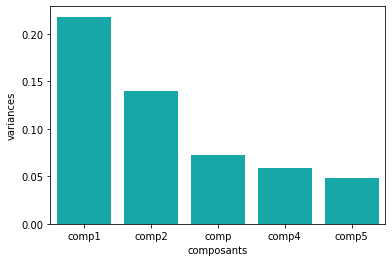

In [18]:
# Affichage de pca.explained_variance_ratio_, ainsi que de pca.explained_variance_ratio_.cumsum()
import seaborn as sns
df = pandas.DataFrame({'variances':pca.explained_variance_ratio_[:5],
             'composants':['comp1','comp2','comp','comp4','comp5']})
sns.barplot(x='composants',y="variances", 
           data=df, color="c");

pca.explained_variance_ratio permet d'obtenir une array avec les valeurs propres exprimées en pourcentage de la variance expliquée. Ci dessus j'ai affiché les 5 composants avec les plus gros pourcentages.
on peut donc constater que comp 1 représente 20% de la variation, comp2 14% etc... 

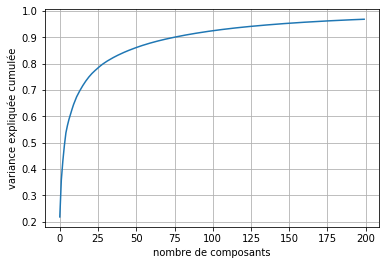

In [19]:
plt.rcParams['axes.grid'] = True # Affichage d'une grille
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composants')
plt.ylabel('variance expliquée cumulée');

Dans le graphique ci dessus, j'ai affiché la variances expliquée cumulée. Ce graphique représente la répartition de la variance expliqué dans nos 200 composants, on peut conclure plusieurs choses de ce graphique :
- Les 75 premiers composants contiennent 90% de la variances
- Plus on ajoute de composants moins nos images seront bruitées 
- La différence entre 200 et 1850 composants est minime, car avec 200 composants, on est déjà très proches des 100% de la variance

### `pca.components_`

In [20]:
print("dimension de nos images : {}".format(d.data[0].shape))
print("dimension de pca.components _: {}".format(pca.components_.shape))

dimension de nos images : (1850,)
dimension de pca.components _: (200, 1850)


On peut constater que pca.components_ contient nos 200 composants, ainsi que la projection de la dimension de nos images sur ces composants.

# Analyses des précipitations en France (7 points)

Dans cette section, nous allons appliquer une ACP aux données de précipitations dans les grandes villes de France, déjà vues lors du premier TP. Il s'agit de rajouter l'ACP à l'arsenal d'outils de visualisation que nous avons vus. 

In [21]:
# imports
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Chargeons les données
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# renommons la première colonne "Ville"
raw_data = raw_data.rename(columns = {raw_data.columns[0]:'Ville'})

# choisissons cette colonne en index
raw_data = raw_data.set_index('Ville')


# Liste des mois de l'année
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
# Niveaux de pluis
types = ['Précipitations', 'Jours de pluie']

# Création d'un index a partir de nos variables months et types, avec comme nom grandeur et mois
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])
# Création d'une liste allant de 0 à 11 puis de 12 à 24
nested_columns = list(range(12)) + list(range(13, 25))

# On crée une DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,nested_columns].to_numpy(), columns=index)

# On rajoute à nos nouvelle données l'index de nos données précedente (raw_data)
data = data.set_index(raw_data.index)

# Création d'une liste contenant des noms de colonnes appartenant raw_data.
# Ajout des colonnes de data_raw séléctionné dans la liste other_column, dans data (avec leurs données)
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns]

# Affichage
data.head()

Grandeur  Précipitations                                                    \
Mois             Janvier Février  Mars  Avril    Mai   Juin Juillet   Août   
Ville                                                                        
Ajaccio             78.0    69.0  51.0   39.0   43.0   23.0    10.0   15.0   
Angers              65.0    50.0  60.0   45.0   50.0   55.0    35.0   60.0   
Angoulème           79.0    68.0  64.0   62.0   70.0   58.0    53.0   66.0   
Besançon            94.0    87.0  75.0   74.0   86.0  107.0    80.0  116.0   
Biarritz           128.0   105.0  98.0  102.0  100.0   91.0    69.0  123.0   

Grandeur                     ... Jours de pluie                            \
Mois      Septembre Octobre  ...      Septembre Octobre Novembre Décembre   
Ville                        ...                                            
Ajaccio        43.0    81.0  ...            6.0    10.0     11.0     13.0   
Angers         55.0    65.0  ...           12.0    13.0     15.0     16.0   
Angoulème      69.0    70.0  ...           12.0    13.0     15.0     16.0   
Besançon      106.0    78.0  ...           13.0    14.0     15.0     15.0   
Biarritz      155.0   152.0  ...           14.0    15.0     16.0     17.0   

Grandeur  Température moyenne annuelle Amplitude annuelle des températures  \
Mois                                                                         
Ville                                                                        
Ajaccio                          14.71                                14.5   
Angers                           11.28                                14.5   
Angoulème                        12.02                                14.9   
Besançon                         10.04                                17.6   
Biarritz                         13.58                                12.3   

Grandeur  Insolation annuelle Latitude Longitude Géographie  
Mois                                                         
Ville                                                        
Ajaccio                2811.0    41.55      8.44        Sud  
Angers                 1899.0    47.28     -0.33      Ouest  
Angoulème              1989.0    45.39      0.09      Ouest  
Besançon               1897.0    47.15      6.02        Est  
Biarritz               1921.0    43.29     -1.34      Ouest  

[5 rows x 30 columns]

## a. Utilisation simple ACP

Pour la suite:
1. Affichez une ACP des données de précipitations en 2D (deux composantes), avec pour chaque ville:
   * Son nom
   * La taille du point dépendant du volume total de précipitations
   * La couleur du point dépendant de la région.
2. Affichez une ACP du nombre de jours de pluie, calculée sur les colonnes (donc les mois), avec le nom des mois et la taille des points dépendants du nombre de jours de pluie moyen par mois. 

# ACP des précipitations par ville



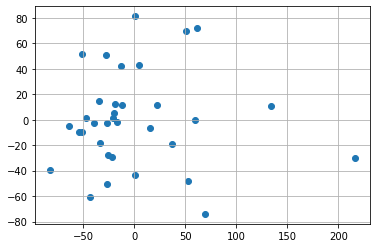

In [22]:
precip = data['Précipitations'] # selection des précipitations par villes

################# réalisation d'une acp des précipitations #################
pca = PCA(n_components=2) # Choix de deux composants comme paramètre
pca.fit(precip)
data_pca = pca.transform(precip)
#########################################################################

df = pandas.DataFrame(data=data_pca, columns=['DIM0','DIM1']) # Création d'un dataframe à partir de l'acp
plt.scatter(df.DIM0,df.DIM1) # Affichage d'un graphique représentant chaque villes décritent par nos deux composants

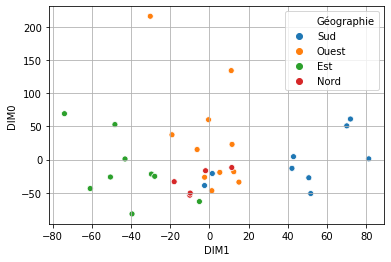

In [23]:
df["Géographie"] = data.Géographie.values # Ajout de la dimension géographie à notre dataframe 
# Affichage du même graphique que précedement, en rajoutant la dimension géographie
sns.scatterplot(x="DIM1", y="DIM0", hue="Géographie", data=df) 

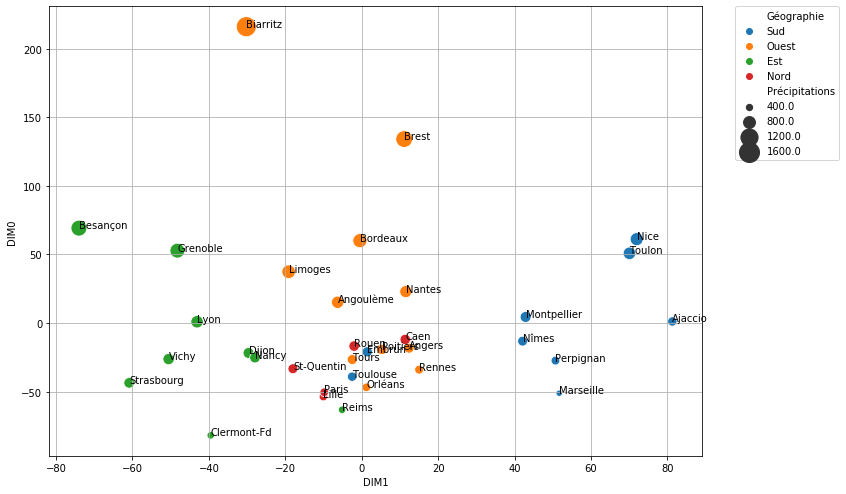

In [24]:
# Ajout de deux nouvelles dimensions à notre dataframe ville et précipitation total par villes
grouped_data = data.groupby(axis=1, level='Grandeur')
gp = grouped_data.sum()["Précipitations"]
df["Précipitations"] = gp.values
df["ville"] = data.index
##############################################################################################

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)# Selection de la taille de notre futur graphique

# Affichage du même graphique que précedement en rajoutant la dimension Précipitation
sns.scatterplot(x="DIM1", y="DIM0", hue="Géographie",size = "Précipitations", sizes=(40, 400),
                data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Dissociation du graphique et de la légende

################# Ajout du nom de chaque ville à côté de son point #################
def label_point(x, y, val, ax):
    a = pandas.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(df.DIM1, df.DIM0, df.ville, plt.gca())  

# ACP du nombre de jours de pluie par mois

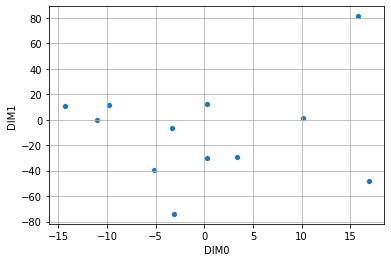

In [25]:
jours = data['Jours de pluie'].T # selection des Jours de pluies par mois

################# réalisation d'une acp des précipitations #################
pca = PCA(n_components=2) # Choix de deux composants comme paramètre
pca.fit(jours)
data_pca = pca.transform(jours)
############################################################################

df2 = pandas.DataFrame(data=data_pca, columns=['DIM0','DIM1']) #  Création d'un dataframe à partir de l'acp
sns.scatterplot(df2.DIM0,df.DIM1)  # Affichage d'un graphique représentant chaque mois décrient par nos deux composants

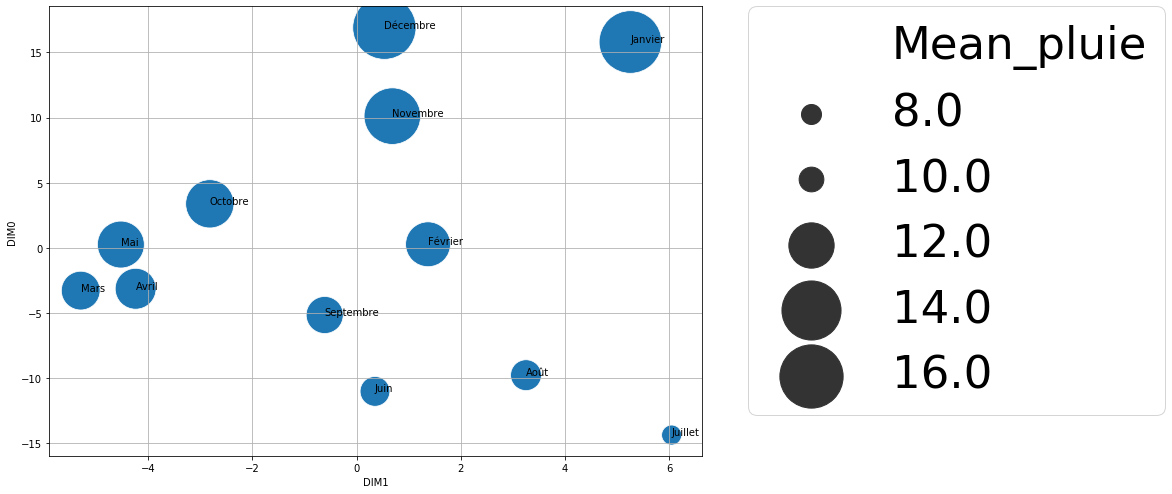

In [26]:
# Ajout de deux nouvelles dimensions à notre dataframe mois et moyenne de jours de pluies par mois
dt = jours.T.mean(axis = 0) 
df2["Mean_pluie"] = dt.values
df2["Mois"] = data['Jours de pluie'].columns.T.values
##############################################################################################

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # Selection de la taille de notre futur graphique

# Affichage du même graphique que précedement en rajoutant la dimension moyenne de jours de pluies par mois
sns.scatterplot(x="DIM1", y="DIM0",size = "Mean_pluie", sizes=(400, 4000),
                data=df2)
plt.legend(bbox_to_anchor=(1.07, 1), loc=2, borderaxespad=0., fontsize=45) # Dissociation du graphique et de la légende

################# Ajout du nom du mois à côté de son point #################
def label_point(x, y, val, ax):
    a = pandas.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(df2.DIM1, df2.DIM0, df2["Mois"], plt.gca()) 